In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
#Reading in the data  
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [5]:
#Creating function that plots all points from the data specifying blue and red colors to differentiate between
#admitted and rejected students.
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([t[0][0] for t in admitted], [t[0][1] for t in admitted], s=25, color='blue', edgecolor = 'k')
    plt.scatter([t[0][0] for t in rejected], [t[0][1] for t in rejected], s=25, color='red', edgecolor ='k')
    
def display(m, b, color='g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(m*x + b)
    plt.show

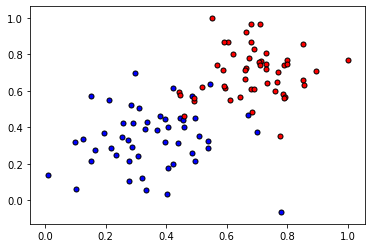

In [6]:
#Plotting the data
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X, y)
plt.show()

In [28]:
def sigmoid(x):
    return 1/1+np.exp(-x)

def output_formula(features, weights, bias):
    return sigmoid((np.dot(features, weights) + bias))
        
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

In [31]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n===== Epoch", e,"======")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

W:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater



===== Epoch 0 ======
Train loss:  nan
Accuracy:  0.49

===== Epoch 10 ======
Train loss:  nan
Accuracy:  0.5

===== Epoch 20 ======
Train loss:  nan
Accuracy:  0.5

===== Epoch 30 ======
Train loss:  nan
Accuracy:  0.5

===== Epoch 40 ======
Train loss:  nan
Accuracy:  0.5

===== Epoch 50 ======
Train loss:  nan
Accuracy:  0.5

===== Epoch 60 ======
Train loss:  nan
Accuracy:  0.5


W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater



===== Epoch 70 ======
Train loss:  nan
Accuracy:  0.5

===== Epoch 80 ======
Train loss:  nan
Accuracy:  0.5

===== Epoch 90 ======
Train loss:  nan
Accuracy:  0.5


W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
W:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater


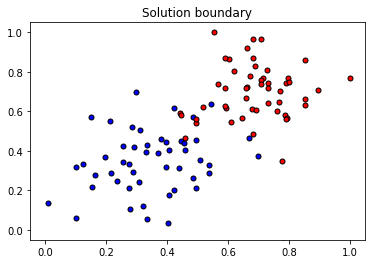

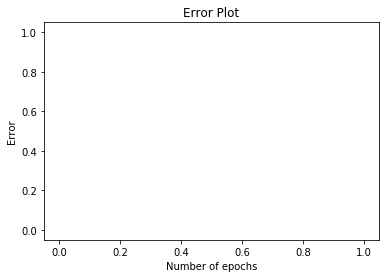

In [32]:
train(X, y, epochs, learnrate, True)